# Taller 4

## Métodos Computacionales 1 2022-10

Instrucciones: Suba el jupyter notebook **.ipynb** en la actividad de bloque neon. El archivo debe ser nombrado ApellidoNombre_ApellidoNombre_Taller4.ipynb, para las partes analíticas el archivo debe ser **.pdf** ApellidoNombre_ApellidoNombre_Taller4.pdf. **El archivo debe poder correr en el binder de la magistral** 

Si un ejercicio demora **más de 10 segundos** en correr se considerará **incorrecto**.

No modifique el cuaderno, ni los casos de prueba, puede correr los casos de prueba pero no modificarlos.

**Entrega: Miercoles 6 de Abril 11:59 pm**

## Librerias

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

## Problema 1

Considere los siguientes puntos

```
x = [1., 2., 3., 4., 5.]
y = [1.20,  0.31, 3.92, 3.78, 4.47]
```

A partir del metodo de  [regresion matricial](https://github.com/diegour1/MetodosComputacionales1/blob/main/Notebooks/08%20-%20fit_lineal_y_solucion_sistema_de_ecuaciones.ipynb) visto en clase. Realice 4 regresiones de grado 0, 1, 2, 3, y 4. Gráfique los puntos junto con las regresiones. El gráfico se debe ver como se muestra a continuación. 

![](https://raw.githubusercontent.com/diegour1/MetodosComputacionales1/main/DataFiles/image7.png)

Debe implementar el método no puede usar librerias como `sklearn.linear_model.LinearRegression`.

Text(0, 0.5, 'Y')

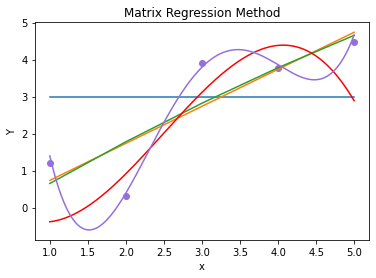

In [13]:
x = [1., 2., 3., 4., 5.]
y = [1.20,  0.31, 3.92, 3.78, 4.47]

def zero(x):
    n = np.sum(np.array(x))
    mean = n / len(x)
    temp = []
    for i in range(0,len(x),1):
        temp.append(mean)
    return np.array(temp)

def linear(x,y):
    dots = []
    for i in range(0,len(x),1):
        temp = []
        temp.append(1)
        temp.append(x[i])
        dots.append(temp)
    x = np.array(dots)
    fit = np.transpose(np.linalg.inv(np.transpose(x)@x))@(np.transpose(x))@(np.array(y))
    return ((fit[1]*np.array(x))+fit[0])[:,1]

def quadratic(x,y):
    x = np.array(x)
    y = np.array(y)
    eq1 = [np.sum(x**2), np.sum(x), len(x)]
    eq2 = [np.sum(x**3), np.sum(x**2), np.sum(x)]
    eq3 = [np.sum(x**4), np.sum(x**3), np.sum(x**2)]
    a = np.array([eq1, eq2, eq3])
    b = np.array([[np.sum(y)], [np.sum(x*y)], [np.sum((x**2)*y)]])
    solved = np.linalg.solve(a,b)
    return (solved[0]*(x**2))+(solved[1]*x)+solved[2]

def cubic(x,y):
    x = np.array(x)
    y = np.array(y)
    eq1 = [np.sum(x**3), np.sum(x**2), np.sum(x), len(x)]
    eq2 = [np.sum(x**4), np.sum(x**3), np.sum(x**2), np.sum(x)]
    eq3 = [np.sum(x**5), np.sum(x**4), np.sum(x**3), np.sum(x**2)]
    eq4 = [np.sum(x**6), np.sum(x**5), np.sum(x**4), np.sum(x**3)]
    a = np.array([eq1, eq2, eq3, eq4])
    b = np.array([[np.sum(y)], [np.sum(x*y)], [np.sum((x**2)*y)], [np.sum((x**3)*y)]])
    solved = np.linalg.solve(a,b)
    return (solved[0]*(x**3))+(solved[1]*(x**2))+(solved[2]*x)+solved[3]

def fourth(x,y):
    x = np.array(x)
    y = np.array(y)
    eq1 = [np.sum(x**4), np.sum(x**3), np.sum(x**2), np.sum(x), len(x)]
    eq2 = [np.sum(x**5), np.sum(x**4), np.sum(x**3), np.sum(x**2), np.sum(x)]
    eq3 = [np.sum(x**6), np.sum(x**5), np.sum(x**4), np.sum(x**3), np.sum(x**2)]
    eq4 = [np.sum(x**7), np.sum(x**6), np.sum(x**5), np.sum(x**4), np.sum(x**3)]
    eq5 = [np.sum(x**8), np.sum(x**7), np.sum(x**6), np.sum(x**5), np.sum(x**4)]
    a = np.array([eq1, eq2, eq3, eq4, eq5])
    b = np.array([[np.sum(y)], [np.sum(x*y)], [np.sum((x**2)*y)], [np.sum((x**3)*y)], [np.sum((x**4)*y)]])
    solved = np.linalg.solve(a,b)
    return (solved[0]*(x**4))+(solved[1]*(x**3))+(solved[2]*(x**2))+(solved[3]*x)+solved[4]

cubic_interpolation_model = interp1d(x, y, kind = "cubic")
X = np.linspace((np.array(x)).min(), (np.array(x)).max(), 500)
Y = cubic_interpolation_model(X)

plt.scatter(x,y, c='mediumpurple')
plt.plot(X, zero(X))
plt.plot(x, linear(x,y))
plt.plot(x, quadratic(x,y))
plt.plot(X, cubic(X,Y), 'red')
plt.plot(X, fourth(X,Y), 'mediumpurple')
plt.title('Matrix Regression Method')
plt.xlabel('x')
plt.ylabel('Y')

## Problema 2

Considere una cadena larga de resistencias como se muestra en la figura:

![](https://raw.githubusercontent.com/diegour1/MetodosComputacionales1/main/DataFiles/image8.png)

Todos los resitores tienen las misma resistencia $R$. El voltage en la parte superior izquierda del sistema es $V_+ = 5 \text{V}$. El problema consiste en obtener los voltajes $V_1, \ldots, V_N$ de los puntos internos del circuito. 

a) Usando la ley de Ohm y la ley de corrientes de Kirchoff, la cual dice que la corriente total que fluye hacia afuera o hacia adentro de cada nodo del circuito es cero. Muestre que los voltajes $V_1, \ldots, V_N$ cumplen con las siguientes ecuaciones.

$$3V_1 − V_2 − V_3 = V_+$$
$$− V_1 + 4V_2 − V_3 − V_4 = V_+,$$
$$\vdots$$
$$− V_{i − 2} − V_{i − 1} + 4V_i − V_{i + 1} − V_{i + 2} = 0,$$
$$\vdots$$
$$− V_{N − 3} − V_{N − 2}+ 4V_{N − 1} − V_N = 0,$$
$$− V_{N − 2} − V_{N − 1} + 3V_N = 0.$$

b) Escriba las ecuaciones de la forma $A\vec{x} = \vec{b}$ encuentre los valores de la matriz $A$ y del vector $\vec{b}$, para $N=6$. Imprima estos dos resultados en el notebook.

c) Escriba un programa que resuelva los valores de $V_i$ cuando $N=6$ es decir 6 nodos internos. Guarde e imprima los valores en el vector $\vec{x}$.

d) Encuentre la resitencia total $R_{(N=6)} = \alpha R$, para la red $N=6$, donde $\alpha$ es un constante, imprima el valor de $\alpha$.

In [14]:
matrix = np.array([[3,-1,-1,0,0,0,5],
                  [-1,4,-1,-1,0,0,5],
                  [0,-1,-1,4,-1,-1,0],
                  [0,0,-1,-1,4,-1,0],
                  [0,0,0,-1,-1,3,0],
                  [-1,-1,4,-1,-1,0,5]])

def find_system(matrix):
    A = []
    for i in matrix:
        temp = []
        for j in range(0,6,1):
            temp.append(i[j])
        A.append(temp)
    A = np.array(A)
    b = []
    for i in matrix:
        b.append(i[6])
    b = np.array(b)
    return (A,b)

def find_voltages(matrix):
    solved = matrix.copy().astype(float)
    n = solved.shape[0]
    for i in range(n):
        for j in range(i+1, n):
            solved[j] = (solved[j, i] / solved[i, i]) * solved[i] - solved[j]
    solved = solved.copy().astype(float)
    n = solved.shape[0]
    for i in range(n-1,-1,-1):
        for j in range(i - 1, -1, -1):
            solved[j] = (solved[j, i] / solved[i, i]) * solved[i] - solved[j]
        solved[i] = solved[i] / solved[i, i]
    x = []
    for i in solved:
        x.append(i[6])
    x = np.array(x)
    return x

A, x, b = find_system(matrix)[0], find_voltages(matrix), find_system(matrix)[1]

In [15]:
# codigo para la verificacion
print(A)
print(b)
print(x)

[[ 3 -1 -1  0  0  0]
 [-1  4 -1 -1  0  0]
 [ 0 -1 -1  4 -1 -1]
 [ 0  0 -1 -1  4 -1]
 [ 0  0  0 -1 -1  3]
 [-1 -1  4 -1 -1  0]]
[5 5 0 0 0 5]
[5.07541478 4.826546   5.39969834 3.83107089 2.86576169 2.23227753]


In [16]:
alpha = 0
matrix = np.array([[0,0,1,1],
                  [0,0,2,1],
                  [0,0,2,1],
                  [0,0,2,1],
                  [0,0,2,1],
                  [0,0,2,1],
                  [1,1,0,0]])
for i in matrix:
    for j in i:
        if j == 1:
            alpha += 1
        elif j == 2:
            temp = alpha/(alpha+1)
            alpha = temp
        else:
            pass

In [17]:
# codigo para la verificacion
print(alpha)

3.6180555555555554


## Problema 3

Considere dos bloques de masa $m_1$ y $m_2$, el bloque $m_1$ empieza con una velocidad $v_1 = - 1 \text{ m/s}$ el bloque $m_2$ empieza en reposo. Primero el bloque 1 choca con el bloque 2 de forma elastica, luego el bloque 2 choca elasticamente contra la pared, y luego se dirige el bloque 2 de nuevo hacia el bloque 1 para chocar de nuevo elasticamente. El bloque 2 choca elasticamente varias veces contra la pared y contra el bloque 1 y se cuentan el número de choques elasticos totales, hasta que los bloques dejan de chocar.

![](https://raw.githubusercontent.com/diegour1/MetodosComputacionales1/main/DataFiles/image9.png)

Si los bloques 1 y 2 tienen en cierto momento una velocidad $v_{1i}$ y $v_{2i}$ la velocidad después del choque elastico están dados por, 

$$
v_{1f} = v_{1i}\Big(\frac{m_1-m_2}{m_1+m_2}\Big) + v_{2i}\Big(\frac{2m_2}{m_1+m_2}\Big)
$$

$$
v_{2f} = v_{1i}\Big(\frac{2m_1}{m_1+m_2}\Big) + v_{2i}\Big(\frac{m_2-m_1}{m_1+m_2}\Big)
$$

Cree la función `num_collisions(m1, m2)` que reciba las masas $m_1$ y $m_2$ de los bloques 1 y 2 respectivamente, y retorne el número de choques totales `count`, la velocidad inicial del bloque 1 es $v_1 = -1 \text{ m/s}$ y el bloque 2 empieza en reposo.

Pista: Escriba las ecuaciones anteriores de forma matricial. Más detalles del problema se pueden encontrar en este [link](https://www.youtube.com/watch?v=HEfHFsfGXjs&ab_channel=3Blue1Brown).

Para pensar (no para hacer): ¿ Cómo resolvería el problema analíticamente ? (Sin ver las soluciones en internet)

In [18]:
def num_collisions(m1, m2):
  v1 = -1
  v2 = 0
  count = 0
  while v1 < v2:
    count += 1
    v1_old = v1
    v2_old = v2
    v1 = (v1_old*((m1-m2)/(m1+m2)))+(v2_old*((2*m2)/(m1+m2)))
    v2 = (v1_old*((2*m1)/(m1+m2)))+(v2_old*((m2-m1)/(m1+m2)))
    if v2 < 0:
      count += 1
      v2 = -v2
  return count

In [19]:
# codigo para la verificacion
print(num_collisions(1, 1))
print(num_collisions(10, 1))
print(num_collisions(100, 1))
print(num_collisions(1000, 1))
print(num_collisions(10000, 1))
print(num_collisions(100000, 1))
print(num_collisions(1000000, 1))
print(num_collisions(10000000, 1))
print(num_collisions(100000000, 1))

3
10
31
99
314
993
3141
9934
31415


## Bono 0.5: 

Obtenga las ecuaciones del choque elastico del problema 3.